In [215]:
import pandas as pd 

In [216]:
tge_init = pd.read_excel('güvenEndeksi.xls')
tge_init

,Ocak,Şubat,Mart,Nisan,Mayıs,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasım,Aralık
2007,78.581836,79.520586,79.219967,80.440610,81.732518,80.949646,82.270596,85.024409,83.885017,82.975294,79.297517,80.666743
2008,78.892660,74.376834,68.739040,63.013179,62.138995,61.791560,63.786432,66.626884,67.497974,61.017036,55.657354,56.676348
2009,58.334549,60.783764,61.550822,67.531254,70.053371,72.046072,69.145565,68.079112,68.701343,67.236810,65.155241,65.567809
2010,66.013158,68.626109,71.519006,72.573485,73.357630,74.815107,74.254487,74.128791,77.184919,75.794565,78.115084,77.765970
2011,78.062666,80.340164,80.177315,80.235176,79.628224,83.193337,81.611040,78.521325,80.473879,76.505506,77.817545,78.820463
2012,79.029069,79.648792,79.336559,75.748829,78.109503,76.758228,77.012661,74.332996,72.116220,69.342532,72.604097,73.587634
2013,75.787368,76.660250,74.911700,75.620600,77.461800,76.231600,78.469400,77.176200,72.112700,75.538500,77.503000,74.972300
2014,72.357599,69.237250,72.712369,78.475685,76.012310,73.705105,73.910926,73.232970,73.963282,70.336465,68.674088,67.749206
2015,67.706960,68.063440,64.393494,65.352375,64.291140,66.448318,64.664529,62.350107,58.519801,62.781250,77.147421,73.575160
2016,71.618563,66.638793,66.996338,68.464690,68.752418,69.428949,67.026588,74.441430,74.286150,74.036602,68.925356,63.380210


In [217]:
# A function to convert our datasets to desired form.
def converter(data, name):
    df = pd.DataFrame(columns=[name])
    for year, row in data.iterrows():
        i = 1
        for column in data:
            df.loc[str(year) +'-'+ str(i)] = row[column]
            i += 1
    return df    

In [218]:
tge = converter(tge_init,'Tüketici Güven Endeksi')
tge.head()

,Tüketici Güven Endeksi
2007-1,78.581836
2007-2,79.520586
2007-3,79.219967
2007-4,80.440610
2007-5,81.732518


In [219]:
ege_init = pd.read_excel('ekonomikGuvenEndeksi.xls')
ege = converter(ege_init,'Ekonomik Güven Endeksi')
ege.head()

,Ekonomik Güven Endeksi
2007-1,112.6
2007-2,110.0
2007-3,110.3
2007-4,111.5
2007-5,106.1


In [220]:
tufe_init = pd.read_excel('tüketiciFiyatEndeksi.xls')
tufe = converter(tufe_init,'Tüketici Fiyat Endeksi')
tufe.head()

,Tüketici Fiyat Endeksi
2007-1,135.84
2007-2,136.42
2007-3,137.67
2007-4,139.33
2007-5,140.03


In [221]:
ois_init = pd.read_excel('ois.xls')
ois = converter(ois_init,'ois??????')
ois.head()

,ois??????
2007-1,-0.58
2007-2,0.66
2007-3,0.99
2007-4,1.27
2007-5,1.33


In [222]:
#merged = pd.merge(pd.merge(tge,ege,left_index=True, right_index=True),tufe,left_index=True, right_index=True)
merged = tge.merge(ege, left_index=True, right_index=True).merge(tufe, left_index=True, right_index=True).merge(ois, left_index=True, right_index=True)
merged.head()

,Tüketici Güven Endeksi,Ekonomik Güven Endeksi,Tüketici Fiyat Endeksi,ois??????
2007-1,78.581836,112.6,135.84,-0.58
2007-2,79.520586,110.0,136.42,0.66
2007-3,79.219967,110.3,137.67,0.99
2007-4,80.440610,111.5,139.33,1.27
2007-5,81.732518,106.1,140.03,1.33


In [223]:
merged.describe()

,Tüketici Güven Endeksi,Ekonomik Güven Endeksi,Tüketici Fiyat Endeksi,ois??????
count,132.000000,132.000000,132.000000,132.000000
mean,72.208655,100.000758,213.829015,0.651136
std,6.389628,10.001301,53.068686,0.861900
min,55.657354,60.400000,135.840000,-1.800000
25%,67.522934,95.700000,166.892500,0.127500
50%,72.749033,100.900000,206.020000,0.535000
75%,77.472100,106.550000,256.270000,1.252500
max,85.024409,116.500000,327.410000,3.210000


In [224]:
x = merged.iloc[:,[1,2,3]].values
y= merged.iloc[:,0].values

In [225]:
# Eğitim ve Veri Setine Ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [226]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [227]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [228]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [229]:
# Test Set Tahmini
y_pred = regressor.predict(X_test)



In [230]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
#Estimator'ımıza oluşturduğumuz modeli gönderiyoruz, cv : kaç parçaya bölüneceğini belirler.Genellikle 10 alınır.
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Ortalama değer (mean): %",accuracies.mean()*100)
print("std: %",accuracies.std()*100)

Ortalama değer (mean): % 71.065503537
std: % 10.0920134277


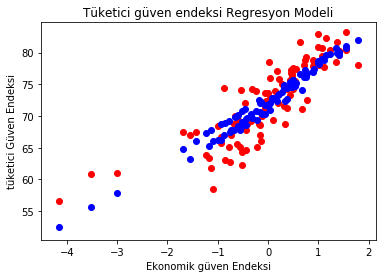

In [231]:
plt.scatter(X_train[:,0], y_train, color = 'red')
modelin_tahmin_y= regressor.predict(X_train)
plt.scatter(X_train[:,0], modelin_tahmin_y, color = 'blue')
plt.title('Tüketici güven endeksi Regresyon Modeli')
plt.xlabel('Ekonomik güven Endeksi')
plt.ylabel('tüketici Güven Endeksi')
plt.show()